In [1]:
%matplotlib inline

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

# numpy
import numpy as np
import scipy as sp

# Plotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Sklearn tools
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
# Setup for example classification problems

## Define the clasifiers to use
names = ["Naive Bayes", 
         "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]

classifiers = [GaussianNB(),
               LinearDiscriminantAnalysis(),
               QuadraticDiscriminantAnalysis()]

In [3]:
# Define sample data to test classification methods 
n_samples = 200
n_features = 2

## Make a linearly separable set
X, y = make_classification(n_features=n_features, n_samples=n_samples, 
                           n_redundant=0, n_informative=n_features,
                           random_state=0, n_clusters_per_class=1) 

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0, n_samples=n_samples),
            make_circles(noise=0.2, factor=0.5, random_state=1, n_samples=n_samples),
            linearly_separable]

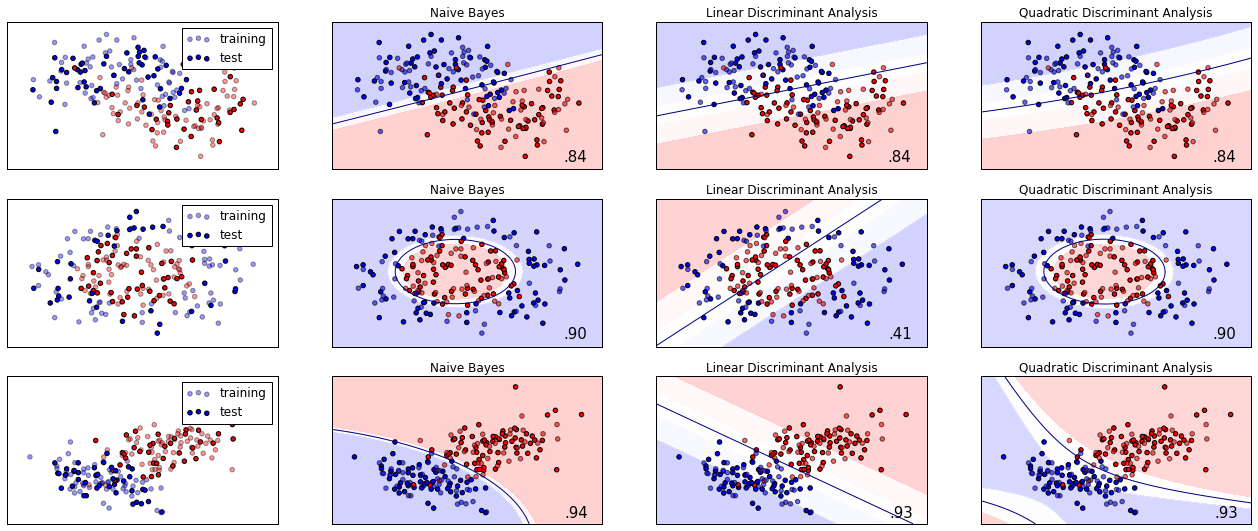

In [4]:
# Plot parameters
h = .05  # step size in the mesh
figure = plt.figure(0, figsize=(18, 9), facecolor='white')
figure.clf()


# Script fot making plot
i = 1
# iterate over datasets
for ds in datasets:
    
    # Preprocess 
    ## Important! shift and scale the data before fitting classifiers 
    X, y = ds
    X = StandardScaler().fit_transform(X)
        

    # Cross validation setup: Define the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    
    # Define a grid for plotting 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plott the sample dataset 
    cm = 'bwr'#plt.cm.RdBu
    cm_bright = ListedColormap(['#0000FF', '#FF0000'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], label='training',
               c=y_train, cmap=cm_bright, alpha=.4)

    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], label='test',
               c=y_test, cmap=cm_bright)
    ax.legend(loc='best')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        
        ## Fit the training set 
        ## This is the key step.  Passing the `clf` classifier the training set
        ## give the data needed to fit the coeficients of the decision function
        clf.fit(X_train, y_train)
        ##
        
        
        ## Cross validation score calculation 
        score = clf.score(X_test, y_test)
        ## 
        
        
        
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] - .5

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        maxabs = max(abs(Z.min()), abs(Z.max()))
        minabs = min(abs(Z.min()), abs(Z.max()))
        levels = sp.linspace(-minabs/2.0, minabs/2.0, 6)
        levels[0]  = -(maxabs+minabs)
        levels[-1] = (maxabs+minabs)
        
        cm='bwr'
        ax.contourf(xx, yy, Z, levels=levels, cmap=cm, alpha=.3)
        ax.contour(xx, yy, Z, levels=[0,], color='k', linewidth=4.0)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()